In [1]:
# libraries
import pandas as pd             
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from matplotlib.ticker import PercentFormatter

In [2]:
# load two csv files, bfs state = state level, bfs_us = US level
bfs_state = pd.read_csv('bfs_state_apps_weekly_nsa.csv')
bfs_us = pd.read_csv('bfs_us_apps_weekly_nsa.csv')

In [3]:
###################################################################################
# Dictionary for bfs_us_apps_weekly_nsa                                           #
# week:Week of the year based on IRS processing. Please                           #
#      see below for how weeks match to calendar                                  #
#      dates. Please note that some years (2008, 2014,                            #
#      and 2020) have 53 weeks.                                                   #
# BA_NSA: Not seasonally adjusted Business Application                            #
#         national series                                                         #
# HBA_BSA: Not seasonally adjusted High-Propensity Business                       #
#          Application national series                                            #
# WBA_NSA: Not seasonally adjusted Businesses Applications                        #
#          with Planned Wages national series                                     #
# CBA_NSA: Not seasonally adjusted Business Applications                          #
#          from Corporations national series                                      #
#                                                                                 #
# Two letters State Abbreviation                                                  #
# Wisconsin = WI,Iowa = IA, Illinois = IL, Indiana = IN                           #
# Michigan = MI, Minnesota = MN                                                   #
###################################################################################

In [4]:
# lower case all column names
bfs_state.columns = map(str.lower, bfs_state.columns)
bfs_us.columns = map(str.lower, bfs_us.columns)

In [5]:
# data cleaning with define function
# define state function
# two variables: state = state name that we want, state_year = the year that we want
def state(state,state_year):
    is_state = bfs_state['state'] == state        
    is_year = bfs_state['year'] == state_year
    a = bfs_state[is_state & is_year]             # we will have the data that contains state and year that we want
  
    a['cum_ba_nsa'] = a.ba_nsa.cumsum()           # generate cum_ba_nsa column that contains cumulated ba_nsa values 
    a['cum_hba_nsa'] = a.hba_nsa.cumsum()         # generate cum_hba_nsa column that contains cumulated hba_nsa values 
    a['cum_wba_nsa'] = a.wba_nsa.cumsum()         # generate cum_wba_nsa column that contains cumulated wba_nsa values 
    a['cum_cba_nsa'] = a.cba_nsa.cumsum()         # generate cum_cba_nsa column that contains cumulated cba_nsa values 
    
    # first week value = NaN, for level graphs
    a.loc[a['week']==1,['ba_nsa']] = np.nan
    a.loc[a['week']==1,['hba_nsa']] = np.nan
    a.loc[a['week']==1,['wba_nsa']] = np.nan
    a.loc[a['week']==1,['cba_nsa']] = np.nan   
    
    a.reset_index(drop=True, inplace=True)
    return a

# define us function
# one variables: us_year = the year that we want
def us(us_year):
    is_us_year = bfs_state['year'] == us_year
    b = bfs_us[is_us_year]                        # we will have the data that contains year that we want
     
    b['cum_ba_nsa'] = b.ba_nsa.cumsum()           # generate cum_ba_nsa column that contains cumulated ba_nsa values 
    b['cum_hba_nsa'] = b.hba_nsa.cumsum()         # generate cum_hba_nsa column that contains cumulated hba_nsa values
    b['cum_wba_nsa'] = b.wba_nsa.cumsum()         # generate cum_wba_nsa column that contains cumulated wba_nsa values 
    b['cum_cba_nsa'] = b.cba_nsa.cumsum()         # generate cum_cba_nsa column that contains cumulated cba_nsa values
    
    # first week value = NaN, for level graphs
    b.loc[b['week']==1,['ba_nsa']] = np.nan
    b.loc[b['week']==1,['hba_nsa']] = np.nan
    b.loc[b['week']==1,['wba_nsa']] = np.nan
    b.loc[b['week']==1,['cba_nsa']] = np.nan
    
    b.reset_index(drop=True, inplace=True)
    return b

#############################################################################################################################
#############################################################################################################################
# if we want Wisconsin's 2010 data, we just type state('WI',2010) or generate dataframe by typing wi_2010 = state('WI',2010)#
# if we want US's 2010 data, we just type us(2010) or generate dataframe by typing us_2010 = us(2010)                       #
#############################################################################################################################
#############################################################################################################################

In [6]:
# define plot functions for US level data
# define us_ba_nsa_plot function
# us_ba_nsa_plot function generates plot for ba_nsa
# five varialbes: year1, year2, year3, year4, year5 that we want
def us_ba_nsa_plot(year1, year2, year3, year4, year5):
    fig, ax = plt.subplots(figsize=(8,5))                   # figure size
    ax.plot(us(year1).week, us(year1).ba_nsa,               # x = week of year1, y = ba_nsa of year1
    'c--', label=year1, linewidth=1.0)                      # color = c, line type = --, linewidth = 1, label=year1
    ax.plot(us(year2).week, us(year2).ba_nsa,               # x = week of year2, y = ba_nsa of year2       
    'r--', label=year2, linewidth=1.0)                      # color = r, line type = --, linewidth = 1, label=year2
    ax.plot(us(year3).week, us(year3).ba_nsa,               # x = week of year3 y = ba_nsa of year3
    'g--', label=year3, linewidth=1.0)                      # color = g, line type = --, linewidth = 1, label=year3
    ax.plot(us(year4).week, us(year4).ba_nsa,               # x = week of year4, y = ba_nsa of year4
    'm', label=year4, linewidth=2.0)                        # color = m, line type = line, linewidth = 2, label=year4
    ax.plot(us(year5).week, us(year5).ba_nsa,               # x = week of year5, y = ba_nsa of year5
    'b', label=year5, linewidth=2.0)                        # color = b, line type = line, linewidth = 2, label=year5 
            
    ax.set_xlabel('Week of Calendar Year')                  # add the x-axis label
    ax.spines['right'].set_visible(False)                  # get rid of the line on the right
    ax.spines['top'].set_visible(False)                    # get rid of the line on top
    ax.legend(loc='upper right')                           # legend location
    plt.savefig('US_ba_nsa_plot'+'_'+str(year1)+'-'+str(year5)+'.eps', format='eps')
    plt.show()

    
# define us_hba_nsa_plot function
# us_hba_nsa_plot function generates plot for hba_nsa
# five varialbes: year1, year2, year3, year4, year5 that we want
def us_hba_nsa_plot(year1, year2, year3, year4, year5):
    fig, ax = plt.subplots(figsize=(8,5))                   # figure size
    ax.plot(us(year1).week, us(year1).hba_nsa,              # x = week of year1, y = hba_nsa of year1
    'c--', label=year1, linewidth=1.0)                      # color = c, line type = --, linewidth = 1, label=year1
    ax.plot(us(year2).week, us(year2).hba_nsa,              # x = week of year2, y = hba_nsa of year2  
    'r--', label=year2, linewidth=1.0)                      # color = r, line type = --, linewidth = 1, label=year2
    ax.plot(us(year3).week, us(year3).hba_nsa,              # x = week of year3 y = hba_nsa of year3
    'g--', label=year3, linewidth=1.0)                      # color = g, line type = --, linewidth = 1, label=year3
    ax.plot(us(year4).week, us(year4).hba_nsa,              # x = week of year4, y = hba_nsa of year4
    'm', label=year4, linewidth=2.0)                        # color = m, line type = line, linewidth = 2, label=year4
    ax.plot(us(year5).week, us(year5).hba_nsa,               # x = week of year5, y = ba_nsa of year5
    'b', label=year5, linewidth=2.0)                        # color = b, line type = line, linewidth = 2, label=year5 
            
    ax.set_xlabel('Week of Calendar Year')                  # add the x-axis label
    ax.spines['right'].set_visible(False)                  # get rid of the line on the right
    ax.spines['top'].set_visible(False)                    # get rid of the line on top
    ax.legend(loc='upper right')                           # legend location
    plt.savefig('US_hba_nsa_plot'+'_'+str(year1)+'-'+str(year5)+'.eps', format='eps')
    plt.show()

    
# define us_perchange_ba_nsa_plot function
# percentage change = (new value - old value) / old value
# us_perchange_ba_nsa_plot function generates plot ba__nsa
# five varialbes: year1, year2, year3, year4, baseyear that we want
def us_perchange_ba_nsa_plot(year1, year2, year3, year4, baseyear):
    fig, ax = plt.subplots(figsize=(8,5))                  # figure size
    ax.plot(us(baseyear).week, 
    ((us(year1).cum_ba_nsa-us(baseyear).cum_ba_nsa)/us(baseyear).cum_ba_nsa)*100,          # x = week of year1, y = cum_ba_nsa of year1
    'b', label=str(year1) , linewidth=2.0)                     # color = b, line type = -, linewidth = 1, label=year1
    ax.plot(us(baseyear).week, 
    ((us(year2).cum_ba_nsa-us(baseyear).cum_ba_nsa)/us(baseyear).cum_ba_nsa)*100,          # x = week of year2, y = cum_ba_nsa of year2  
    'm', label=str(year2), linewidth=2.0)                     # color = m, line type = -, linewidth = 1, label=year2
    ax.plot(us(baseyear).week, 
    ((us(year3).cum_ba_nsa-us(baseyear).cum_ba_nsa)/us(baseyear).cum_ba_nsa)*100,          # x = week of year3 y = cum_ba_nsa of year3
    'r', label=str(year3) , linewidth=1.0)                    # color = r, line type = -, linewidth = 1, label=year3
    ax.plot(us(baseyear).week,
    ((us(year4).cum_ba_nsa-us(baseyear).cum_ba_nsa)/us(baseyear).cum_ba_nsa)*100,          # x = week of year4 y = cum_ba_nsa of year4
    'g', label=str(year4) , linewidth=1.0)                    # color = g, line type = -, linewidth = 1, label=year4
    
    ax.yaxis.set_major_formatter(PercentFormatter())
#   y_ticks = np.arange(-50, 401, 50)
#   plt.yticks(y_ticks)
    plt.axhline(y = 0.0, color = 'black', linestyle = '-', linewidth=0.5)
#   plt.axhline(y = 50.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = 100.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = -50.0, color = 'black', linestyle = '--', linewidth=0.5) 
            
    ax.set_xlabel('Week of Calendar Year')                # add the x-axis label
    ax.spines['right'].set_visible(False)                # get rid of the line on the right
    ax.spines['top'].set_visible(False)                  # get rid of the line on top
    ax.legend(loc='lower right')                         # legend location
    plt.savefig('US_perchange_ba_nsa_plott'+'_'+str(year1)+'-'+str(baseyear)+'.eps', format='eps')
    plt.show()
    
    
# define us_perchange_hba_nsa_plot function
# percentage change = (new value - old value) / old value
# us_perchange_hba_nsa_plot function generates plot for hba__nsa
# five varialbes: year1, year2, year3, year4 baseyear that we want
def us_perchange_hba_nsa_plot(year1, year2, year3, year4, baseyear):
    fig, ax = plt.subplots(figsize=(8,5))                 # figure size
    ax.plot(us(baseyear).week, 
    ((us(year1).cum_hba_nsa-us(baseyear).cum_hba_nsa)/us(baseyear).cum_hba_nsa)*100,        # x = week of year1, y = perchange
    'b', label=str(year1) , linewidth=2.0)                    # color = b, line type = --, linewidth = 1, label=year1
    ax.plot(us(baseyear).week, 
    ((us(year2).cum_hba_nsa-us(baseyear).cum_hba_nsa)/us(baseyear).cum_hba_nsa)*100,        # x = week of year2, y = perchange
    'm', label=str(year2) , linewidth=2.0)                    # color = m, line type = --, linewidth = 1, label=year2
    ax.plot(us(baseyear).week, 
    ((us(year3).cum_hba_nsa-us(baseyear).cum_hba_nsa)/us(baseyear).cum_hba_nsa)*100,        # x = week of year3 y = perchange
    'r', label=str(year3) , linewidth=1.0)                    # color = r, line type = --, linewidth = 1, label=year3
    ax.plot(us(baseyear).week,
    ((us(year4).cum_hba_nsa-us(baseyear).cum_hba_nsa)/us(baseyear).cum_ba_nsa)*100,          # x = week of year4 y = cum_ba_nsa of year4
    'g', label=str(year4) , linewidth=1.0)                    # color = g, line type = -, linewidth = 1, label=year4    
    
    ax.yaxis.set_major_formatter(PercentFormatter())
#   y_ticks = np.arange(-50, 401, 50)
#   plt.yticks(y_ticks)
    plt.axhline(y = 0.0, color = 'black', linestyle = '-', linewidth=0.5)
#   plt.axhline(y = 50.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = 100.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = -50.0, color = 'black', linestyle = '--', linewidth=0.5) 
            
    ax.set_xlabel('Week of Calendar Year')                # add the x-axis label
    ax.spines['right'].set_visible(False)                # get rid of the line on the right
    ax.spines['top'].set_visible(False)                  # get rid of the line on top
    ax.legend(loc='lower right')                          # legend location
    plt.savefig('US_perchange_hba_nsa_plott'+'_'+str(year1)+'-'+str(baseyear)+'.eps', format='eps')
    plt.show()
    
#############################################################################################################################
#############################################################################################################################
# if we want US 2010,2011,2012,2013 ba_nsa plot, 2013 as a base year, we just type us_ba_nsa_plot(2010, 2011, 2012, 2013)   #
# if we want US 2010,2011,2012,2013 hba_nsa plot, 2013 as a base year,we just type us_ba_nsa_plot(2010, 2011, 2012, 2013)   #
# if we want US 2010,2011,2012,2013 perchange_ba_nsa plot, 2013 as a base year,                                             #
#     we just type us_perchange_ba_nsa_plot(2010, 2011, 2012, 2013)                                                         #
# if we want US 2010,2011,2012,2013 perchange_hba_nsa plot, 2013 as a base year,                                            #
#     we just type us_perchange_hba_nsa_plot(2010, 2011, 2012, 2013)                                                        #
#############################################################################################################################
#############################################################################################################################

In [7]:
# define plot functions for state level data
# define state_ba_nsa_plot function
# state_ba_nsa_plot function generates plot for ba__nsa
# six varialbes: target_state, year1, year2, year3, year4, year5 that we want
# for target_state, we type 'WI', 'MN', or any other state that we want
def state_ba_nsa_plot(target_state, year1, year2, year3, year4, year5):
    fig, ax = plt.subplots(figsize=(8,5)) # figure size
    # x = week of year1 of target state, y = ba_nsa of year1 of target state
    ax.plot(state(target_state,year1).week, state(target_state,year1).ba_nsa,
    # color = c, line type = --, linewidth = 1, label=year1
    'c--', label=year1, linewidth=1.0)  
    # x = week of year2 of target state, y = ba_nsa of year2 of target state
    ax.plot(state(target_state,year2).week, state(target_state,year2).ba_nsa,
    # color = r, line type = --, linewidth = 1, label=year2
    'r--', label=year2, linewidth=1.0)
    # x = week of year3 of target state, y = ba_nsa of year3 of target state
    ax.plot(state(target_state,year3).week, state(target_state,year3).ba_nsa,
    # color = g, line type = --, linewidth = 1, label=year3
    'g--', label=year3, linewidth=1.0)
    # x = week of year4 of target state, y = ba_nsa of year4 of target state
    ax.plot(state(target_state,year4).week, state(target_state,year4).ba_nsa,
    # color = m, line type = line, linewidth = 2, label=year4
    'm', label=year4, linewidth=2.0)
    # x = week of year5 of target state, y = ba_nsa of year5 of target state
    ax.plot(state(target_state,year5).week, state(target_state,year5).ba_nsa,
    # color = b, line type = line, linewidth = 2, label=year5 
    'b', label=year5, linewidth=2.0)                        
    ax.set_xlabel('Week of Calendar Year') # add the x-axis label
    ax.spines['right'].set_visible(False) # get rid of the line on the right
    ax.spines['top'].set_visible(False)   # get rid of the line on top
    ax.legend(loc='upper right')          # legend location
    plt.savefig(target_state+'_ba_nsa_plot'+'_'+str(year1)+'-'+str(year5)+'.eps', format='eps')
    plt.show()

    
# define state_hba_nsa_plot function
# state_hba_nsa_plot function generates plot for hba__nsa
# six varialbes: target_state, year1, year2, year3, year4, year5 that we want
# for target_state, we type 'WI', 'MN', or any other state that we want
def state_hba_nsa_plot(target_state, year1, year2, year3, year4, year5):
    fig, ax = plt.subplots(figsize=(8,5)) # figure size
    # x = week of year1 of target state, y = hba_nsa of year1 of target state
    ax.plot(state(target_state,year1).week, state(target_state,year1).hba_nsa,
    # color = c, line type = --, linewidth = 1, label=year1
    'c--', label=year1, linewidth=1.0)  
    # x = week of year2 of target state, y = hba_nsa of year2 of target state
    ax.plot(state(target_state,year2).week, state(target_state,year2).hba_nsa,
    # color = r, line type = --, linewidth = 1, label=year2
    'r--', label=year2, linewidth=1.0)  
    # x = week of year3 of target state, y = hba_nsa of year3 of target state
    ax.plot(state(target_state,year3).week, state(target_state,year3).hba_nsa,      
    # color = g, line type = --, linewidth = 1, label=year3
    'g--', label=year3, linewidth=1.0)  
    # x = week of year4 of target state, y = hba_nsa of year4 of target state
    ax.plot(state(target_state,year4).week, state(target_state,year4).hba_nsa, 
    # color = m, line type = line, linewidth = 2, label=year4
    'm', label=year4, linewidth=2.0)
    # x = week of year5 of target state, y = hba_nsa of year5 of target state
    ax.plot(state(target_state,year5).week, state(target_state,year5).hba_nsa,
    # color = b, line type = line, linewidth = 2, label=year5 
    'b', label=year5, linewidth=2.0) 
    ax.set_xlabel('Week of Calendar Year') # add the x-axis label
    ax.spines['right'].set_visible(False) # get rid of the line on the right
    ax.spines['top'].set_visible(False)   # get rid of the line on top
    ax.legend(loc='upper right')          # legend location
    plt.savefig(target_state+'_hba_nsa_plot'+'_'+str(year1)+'-'+str(year5)+'.eps', format='eps')
    plt.show()

    
# define state_perchange_ba_nsa_plot function
# state_perchange_ba_nsa_plot function generates plot for ba_nsa
# percentage change = (new value - old value) / old value
# six varialbes: target_state, year1, year2, year3, year4, baseyear that we want
# for target_state, we type 'WI', 'MN', or any other state that we want
def state_perchange_ba_nsa_plot(target_state, year1, year2, year3, year4, baseyear):
    fig, ax = plt.subplots(figsize=(8,5)) # figure size  
    ax.plot(state(target_state,baseyear).week, 
    ((state(target_state,year1).cum_ba_nsa-state(target_state,baseyear).cum_ba_nsa)/state(target_state,baseyear).cum_ba_nsa)*100,
    # color = b, line type = -, linewidth = 1, label=year1
    'b', label=str(year1) , linewidth=2.0)                     
    ax.plot(state(target_state,baseyear).week, 
    ((state(target_state,year2).cum_ba_nsa-state(target_state,baseyear).cum_ba_nsa)/state(target_state,baseyear).cum_ba_nsa)*100,
    # color = m, line type = -, linewidth = 1, label=year2
    'm', label=str(year2) , linewidth=2.0)                     
    ax.plot(state(target_state,baseyear).week, 
     ((state(target_state,year3).cum_ba_nsa-state(target_state,baseyear).cum_ba_nsa)/state(target_state,baseyear).cum_ba_nsa)*100,
    # color = r, line type = -, linewidth = 1, label=year3
    'r', label=str(year3) , linewidth=1.0)
    ax.plot(state(target_state,baseyear).week, 
     ((state(target_state,year4).cum_ba_nsa-state(target_state,baseyear).cum_ba_nsa)/state(target_state,baseyear).cum_ba_nsa)*100,
    # color = g, line type = -, linewidth = 1, label=year4
    'g', label=str(year4) , linewidth=1.0)
    
    
    
    ax.yaxis.set_major_formatter(PercentFormatter())
#   y_ticks = np.arange(-50, 401, 50)
#   plt.yticks(y_ticks)
    plt.axhline(y = 0.0, color = 'black', linestyle = '-', linewidth=0.5)
#   plt.axhline(y = 50.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = 100.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = 150.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = -50.0, color = 'black', linestyle = '--', linewidth=0.5)     
    
    ax.set_xlabel('Week of Calendar Year') # add the x-axis label
    ax.spines['right'].set_visible(False) # get rid of the line on the right
    ax.spines['top'].set_visible(False)   # get rid of the line on top
#   ax.legend(loc='upper left')           # legend location
    ax.legend(loc='lower right')   
    plt.savefig(target_state+'_perchange_ba_nsa_plot'+'_'+str(year1)+'-'+str(baseyear)+'.eps', format='eps')
    plt.show()

    
# define state_perchange_hba_nsa_plot function
# state_perchange_hba_nsa_plot function generates plot for hba__nsa
# percentage change = (new value - old value) / old value
# six varialbes: target_state, year1, year2, year3, year4, baseyear that we want
# for target_state, we type 'WI', 'MN', or any other state that we want
def state_perchange_hba_nsa_plot(target_state, year1, year2, year3, year4, baseyear):
    fig, ax = plt.subplots(figsize=(8,5)) # figure size
    ax.plot(state(target_state,baseyear).week, 
    ((state(target_state,year1).cum_hba_nsa-state(target_state,baseyear).cum_hba_nsa)/state(target_state,baseyear).cum_hba_nsa)*100,
    # color = b, line type = -, linewidth = 1, label=year1
    'b', label=str(year1) , linewidth=2.0)                     
    ax.plot(state(target_state,baseyear).week, 
    ((state(target_state,year2).cum_hba_nsa-state(target_state,baseyear).cum_hba_nsa)/state(target_state,baseyear).cum_hba_nsa)*100,
    # color = m, line type = -, linewidth = 1, label=year2
    'm', label=str(year2) , linewidth=2.0)                     
    ax.plot(state(target_state,baseyear).week, 
    ((state(target_state,year3).cum_hba_nsa-state(target_state,baseyear).cum_hba_nsa)/state(target_state,baseyear).cum_hba_nsa)*100,
    # color = r, line type = -, linewidth = 1, label=year3
    'r', label=str(year3) , linewidth=1.0)
    ax.plot(state(target_state,baseyear).week, 
    ((state(target_state,year4).cum_hba_nsa-state(target_state,baseyear).cum_hba_nsa)/state(target_state,baseyear).cum_hba_nsa)*100,
    # color = g, line type = -, linewidth = 1, label=year3
    'g', label=str(year4) , linewidth=1.0)   
    
    ax.yaxis.set_major_formatter(PercentFormatter())
#   y_ticks = np.arange(-50, 401, 50)
#   plt.yticks(y_ticks)
    plt.axhline(y = 0.0, color = 'black', linestyle = '-', linewidth=0.5)
#   plt.axhline(y = 50.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = 100.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = 150.0, color = 'black', linestyle = '--', linewidth=0.5) 
#   plt.axhline(y = -50.0, color = 'black', linestyle = '--', linewidth=0.5)     
    
    ax.set_xlabel('Week of Calendar Year') # add the x-axis label
    ax.spines['right'].set_visible(False) # get rid of the line on the right
    ax.spines['top'].set_visible(False)   # get rid of the line on top
#   ax.legend(loc='upper left')           # legend location
    ax.legend(loc='lower right')   
    plt.savefig(target_state+'_perchange_hba_nsa_plot'+'_'+str(year1)+'-'+str(baseyear)+'.eps', format='eps')
    plt.show()
    
#############################################################################################################################
#############################################################################################################################
# if we want WI 2010,2011,2012,2013 ba_nsa plot, we just type state_ba_nsa_plot('WI',2010, 2011, 2012, 2013)                #
# if we want WI 2010,2011,2012,2013 hba_nsa plot, we just type state_hba_nsa_plot('WI',2010, 2011, 2012, 2013)              #
# if we want WI 2010,2011,2012,2013 cum_ba_nsa plot, we just type state_cum_ba_nsa_plot('WI',2010, 2011, 2012, 2013)        #
# if we want WI 2010,2011,2012,2013 cum_hba_nsa plot, we just type state_cum_ba_nsa_plot('WI',2010, 2011, 2012, 2013)       #
#############################################################################################################################
#############################################################################################################################

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


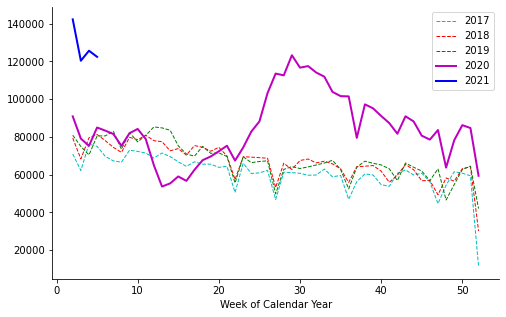

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


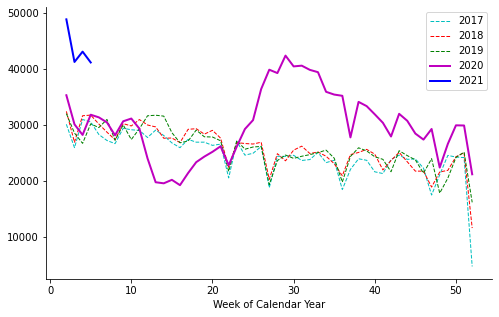

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


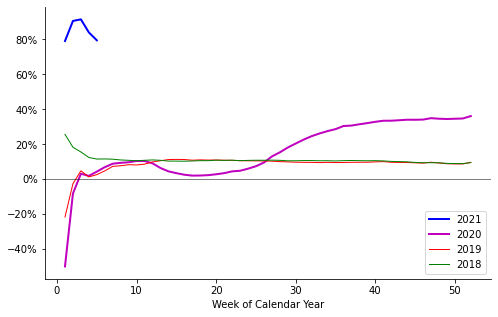

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


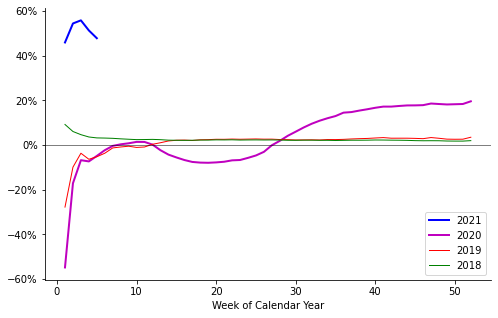

In [8]:
# US
us_ba_nsa_plot(2017, 2018, 2019, 2020, 2021)
us_hba_nsa_plot(2017, 2018, 2019, 2020, 2021)
us_perchange_ba_nsa_plot(2021, 2020, 2019, 2018, 2017)
us_perchange_hba_nsa_plot(2021, 2020, 2019, 2018, 2017)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


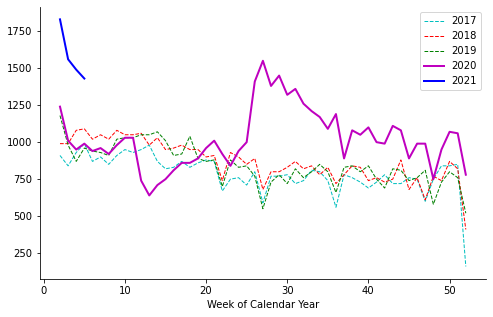

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


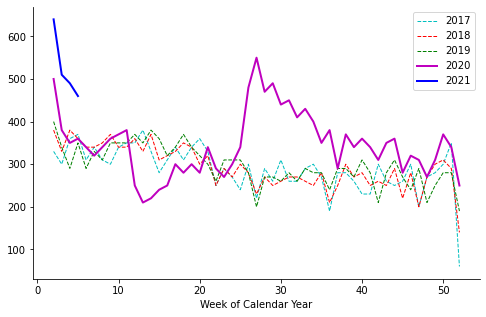

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


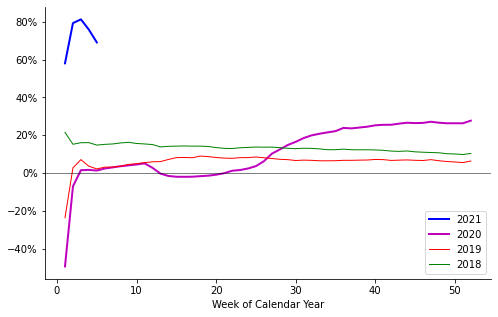

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


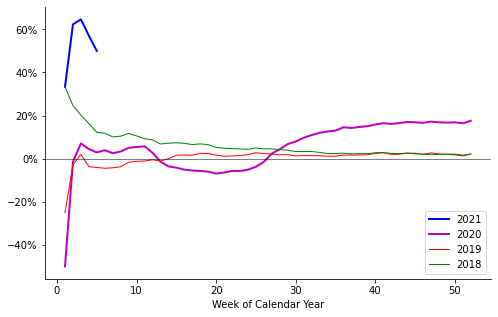

In [9]:
# WISCONSIN
state_ba_nsa_plot('WI', 2017, 2018, 2019, 2020, 2021)
state_hba_nsa_plot('WI', 2017, 2018, 2019, 2020, 2021)
state_perchange_ba_nsa_plot('WI', 2021, 2020, 2019, 2018, 2017)
state_perchange_hba_nsa_plot('WI', 2021, 2020, 2019, 2018, 2017)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


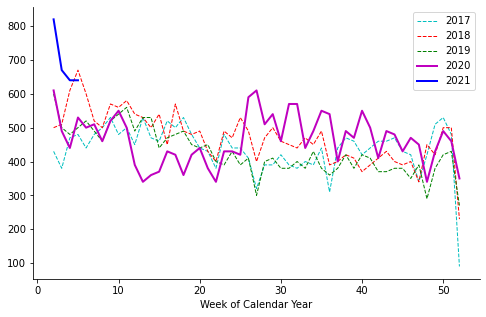

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


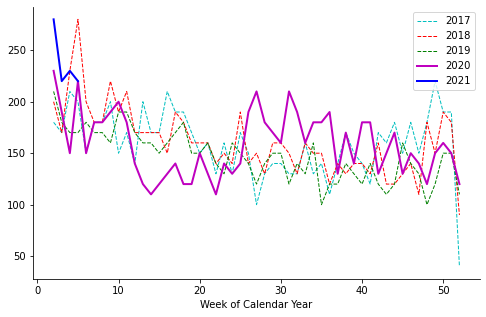

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


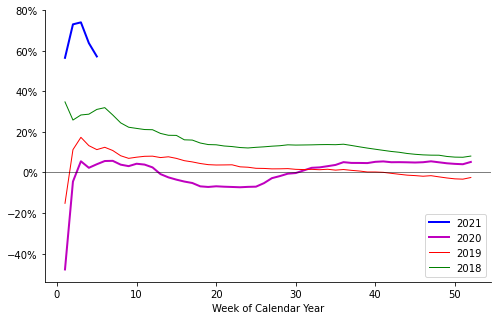

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


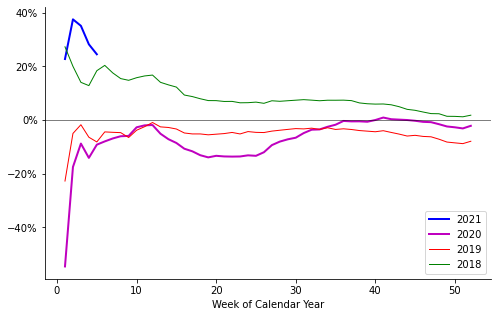

In [10]:
# IOWA
state_ba_nsa_plot('IA', 2017, 2018, 2019, 2020, 2021)
state_hba_nsa_plot('IA', 2017, 2018, 2019, 2020, 2021)
state_perchange_ba_nsa_plot('IA', 2021, 2020, 2019, 2018, 2017)
state_perchange_hba_nsa_plot('IA', 2021, 2020, 2019, 2018, 2017)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


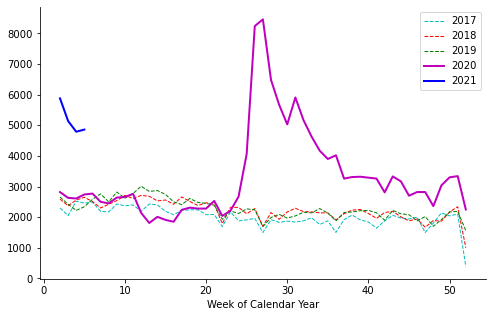

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


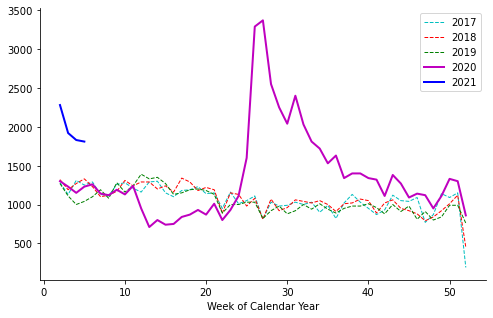

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


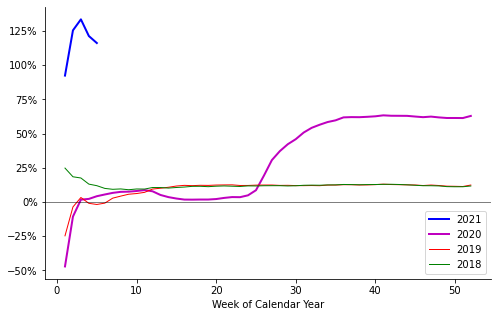

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


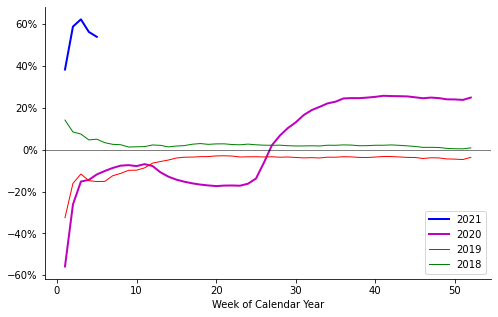

In [11]:
# ILLINOIS
state_ba_nsa_plot('IL', 2017, 2018, 2019, 2020, 2021)
state_hba_nsa_plot('IL', 2017, 2018, 2019, 2020, 2021)
state_perchange_ba_nsa_plot('IL', 2021, 2020, 2019, 2018, 2017)
state_perchange_hba_nsa_plot('IL', 2021, 2020, 2019, 2018, 2017)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


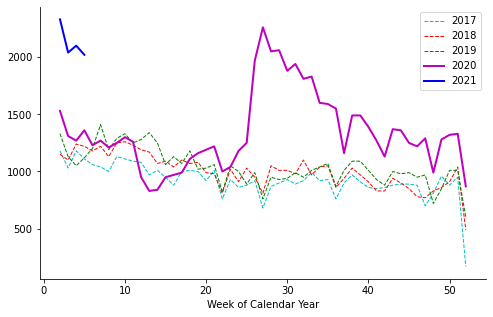

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


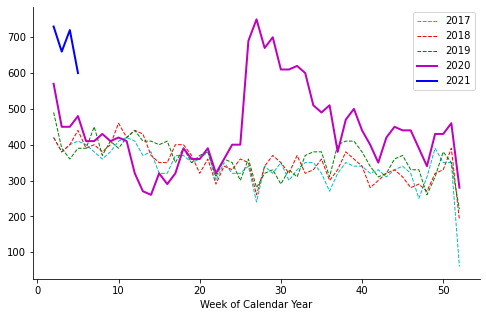

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


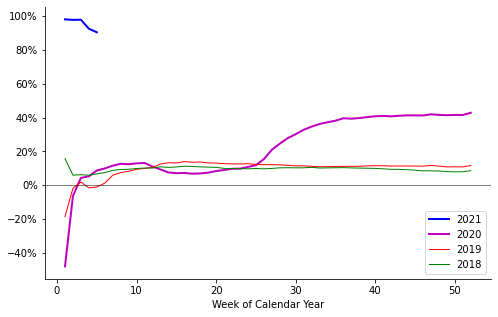

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


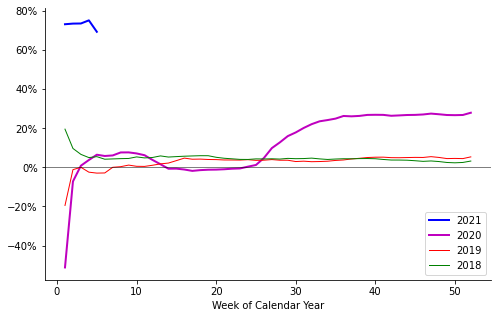

In [12]:
# INDIANA
state_ba_nsa_plot('IN', 2017, 2018, 2019, 2020, 2021)
state_hba_nsa_plot('IN', 2017, 2018, 2019, 2020, 2021)
state_perchange_ba_nsa_plot('IN', 2021, 2020, 2019, 2018, 2017)
state_perchange_hba_nsa_plot('IN', 2021, 2020, 2019, 2018, 2017)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


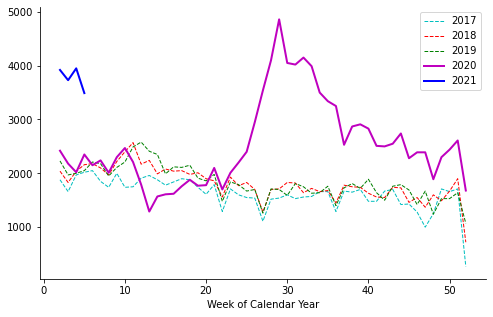

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


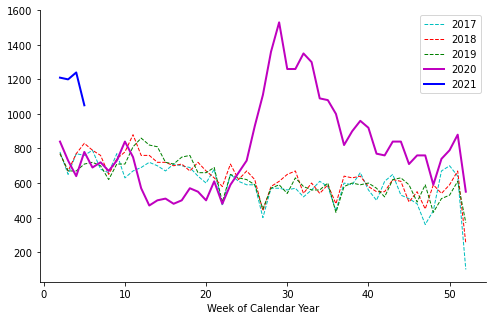

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


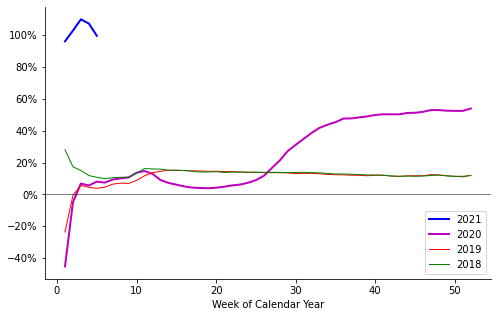

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


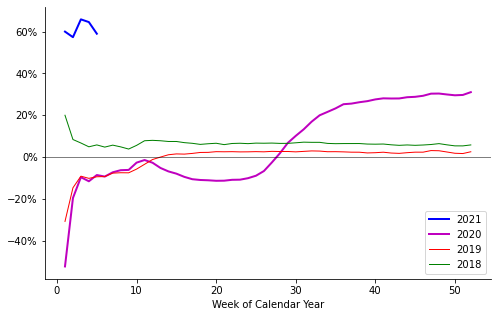

In [13]:
# MICHIGAN
state_ba_nsa_plot('MI', 2017, 2018, 2019, 2020, 2021)
state_hba_nsa_plot('MI', 2017, 2018, 2019, 2020, 2021)
state_perchange_ba_nsa_plot('MI', 2021, 2020, 2019, 2018, 2017)
state_perchange_hba_nsa_plot('MI', 2021, 2020, 2019, 2018, 2017)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


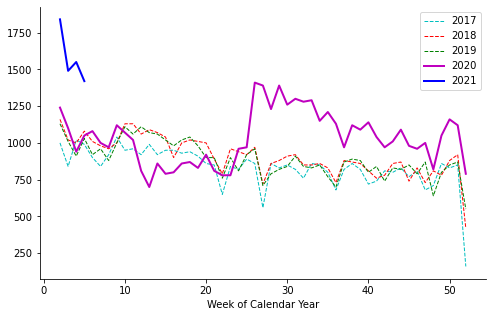

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


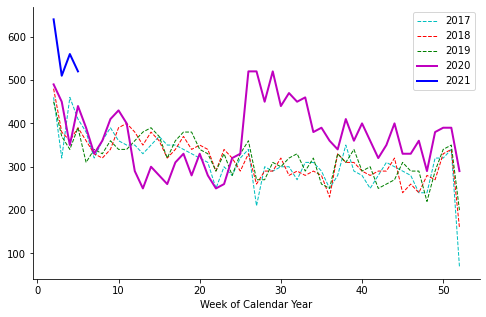

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


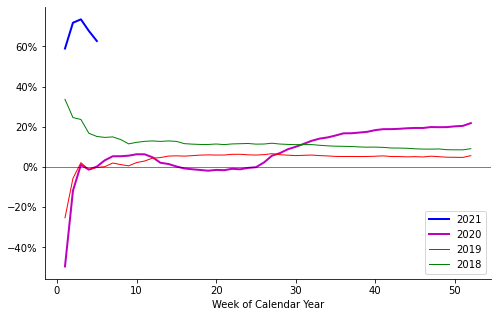

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


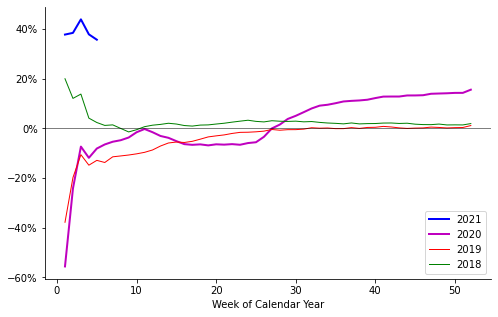

In [14]:
# MINNESOTA
state_ba_nsa_plot('MN', 2017, 2018, 2019, 2020, 2021)
state_hba_nsa_plot('MN', 2017, 2018, 2019, 2020, 2021)
state_perchange_ba_nsa_plot('MN', 2021, 2020, 2019, 2018, 2017)
state_perchange_hba_nsa_plot('MN', 2021, 2020, 2019, 2018, 2017)